## Import Libraries

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy import stats
sns.set_theme(style="darkgrid")

# Create a reference to the carbon dioxide CSV and import it into a Pandas DataFrame
carbondioxide = Path("../Resources/annual-co2-emissions-per-country.csv")
carbondioxide_df = pd.read_csv(carbondioxide)
carbondioxide_df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [2]:
#just get data 1950 forward for United States, China, India, Russia, Brazil, Nigeria, Japan, and World
codes = ['USA', 'CHN', 'IND', 'RUS', 'BRA', 'NGA', 'JPN']

filter1 = carbondioxide_df['Year'] >= 1950
filter2 = carbondioxide_df['Code'].isin(codes)
filter3 = carbondioxide_df['Entity'] == 'World'

# Combine the filters using element-wise logical AND
carbon_filter1 = carbondioxide_df[filter1 & filter2]
carbon_filter2 = carbondioxide_df[filter1 & filter3]

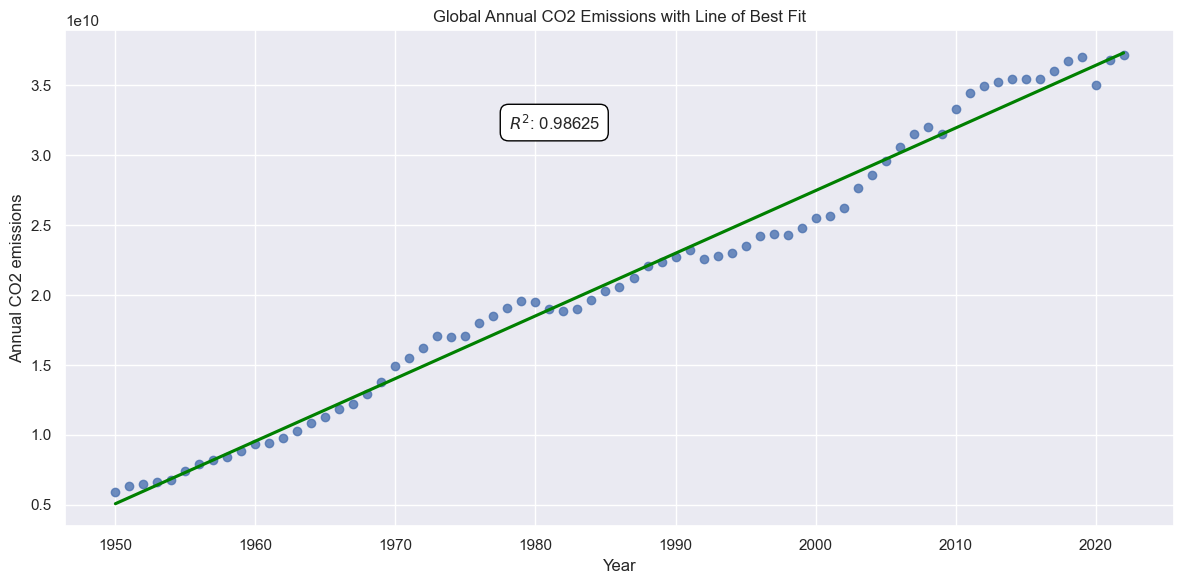

In [3]:
# Create the scatter plot with line of best fit
plt.figure(figsize=(12, 6))
sns.regplot(data=carbon_filter2, x='Year', y='Annual CO₂ emissions', scatter=True, ci=None, line_kws={"color": "green"})

# Get the regression coefficients
slope, intercept, r_value, p_value, std_err = stats.linregress(carbon_filter2['Year'], carbon_filter2['Annual CO₂ emissions'])

# Compute R-squared value
r_squared = r_value ** 2

# Set the title and labels
plt.title(f'Global Annual CO2 Emissions with Line of Best Fit')
plt.xlabel('Year')
plt.ylabel('Annual CO2 emissions')

plt.text(0.4, 0.8, f'$R^2$: {r_squared:.5f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot
plt.tight_layout()
plt.savefig('charts/worldcarbon.png')
plt.show()

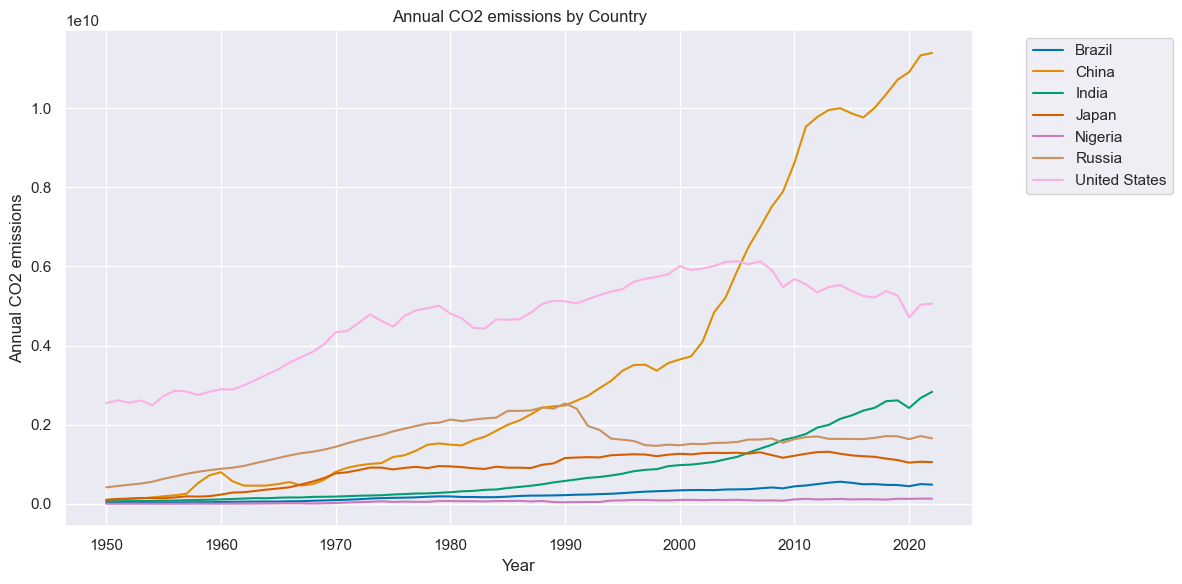

In [4]:
# Create the line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=carbon_filter1, x='Year', y='Annual CO₂ emissions',  hue='Entity', palette='colorblind')

# Set the title and labels
plt.title('Annual CO2 emissions by Country')
plt.xlabel('Year')
plt.ylabel('Annual CO2 emissions')

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('charts/countrycarbon.png')
plt.show()

In [5]:
# Create a reference to the temperature CSV and import it into a Pandas DataFrame
globaltemp = Path("../Resources/global-land-oceantempindex_derived_data.csv")
globaltemp_df = pd.read_csv(globaltemp)
globaltemp_df.head()

,Year,Temperature Anomaly\n(deg C),Smoothed Temperature Anomaly\n(deg C),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1880,-0.16,-0.09,,,,NaN,,
1,1881,-0.08,-0.13,NaN,NaN,NaN,NaN,NaN,NaN
2,1882,-0.11,-0.16,NaN,NaN,NaN,NaN,NaN,NaN
3,1883,-0.17,-0.20,NaN,NaN,NaN,NaN,NaN,NaN
4,1884,-0.28,-0.24,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#clean up the columns and get rid of leftover commas
globaltemp_df.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1)

,Year,Temperature Anomaly\n(deg C),Smoothed Temperature Anomaly\n(deg C)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24
...,...,...,...
138,2018,0.85,0.93
139,2019,0.97,0.92
140,2020,1.02,0.92
141,2021,0.85,0.91


In [7]:
print(globaltemp_df.columns)

Index(['Year ', 'Temperature Anomaly\n(deg C)',
       'Smoothed Temperature Anomaly\n(deg C)', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


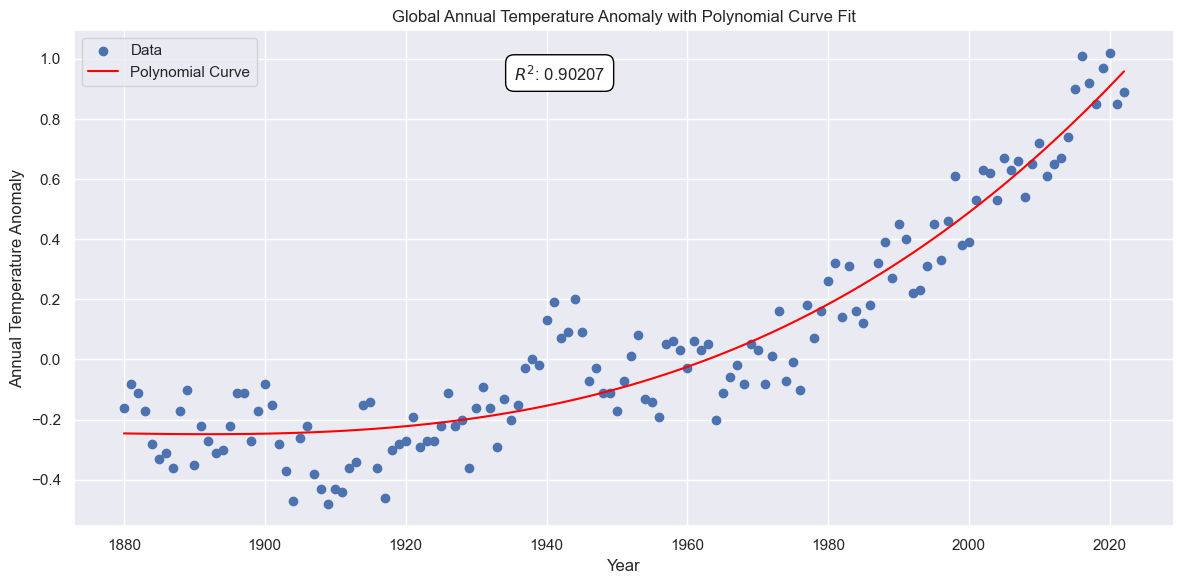

In [8]:
# chart the lines of the temperature anomaly

#create a polynomial line of best fit
degree = 3  # You can change the degree of the polynomial
coefficients = np.polyfit(globaltemp_df['Year '], globaltemp_df['Temperature Anomaly\n(deg C)'], degree)
polynomial = np.poly1d(coefficients)

# Generate points for the polynomial curve
x_values = np.linspace(min(globaltemp_df['Year ']), max(globaltemp_df['Year ']), 100)
y_values = polynomial(x_values)

# Calculate the R-squared value
residuals = globaltemp_df['Temperature Anomaly\n(deg C)'] - polynomial(globaltemp_df['Year '])
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((globaltemp_df['Temperature Anomaly\n(deg C)'] - np.mean(globaltemp_df['Temperature Anomaly\n(deg C)'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Plot the data and the exponential curve
plt.figure(figsize=(12, 6))
plt.scatter(globaltemp_df['Year '], globaltemp_df['Temperature Anomaly\n(deg C)'], label='Data')
plt.plot(x_values, y_values, color='red', label='Polynomial Curve')

# Set the title and labels
plt.title('Global Annual Temperature Anomaly with Polynomial Curve Fit')
plt.xlabel('Year')
plt.ylabel('Annual Temperature Anomaly')
plt.legend()

# Display the R-squared value on the graph
plt.text(0.4, 0.9, f'$R^2$: {r_squared:.5f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot
plt.tight_layout()
plt.savefig('charts/tempanomaly.png')
plt.show()

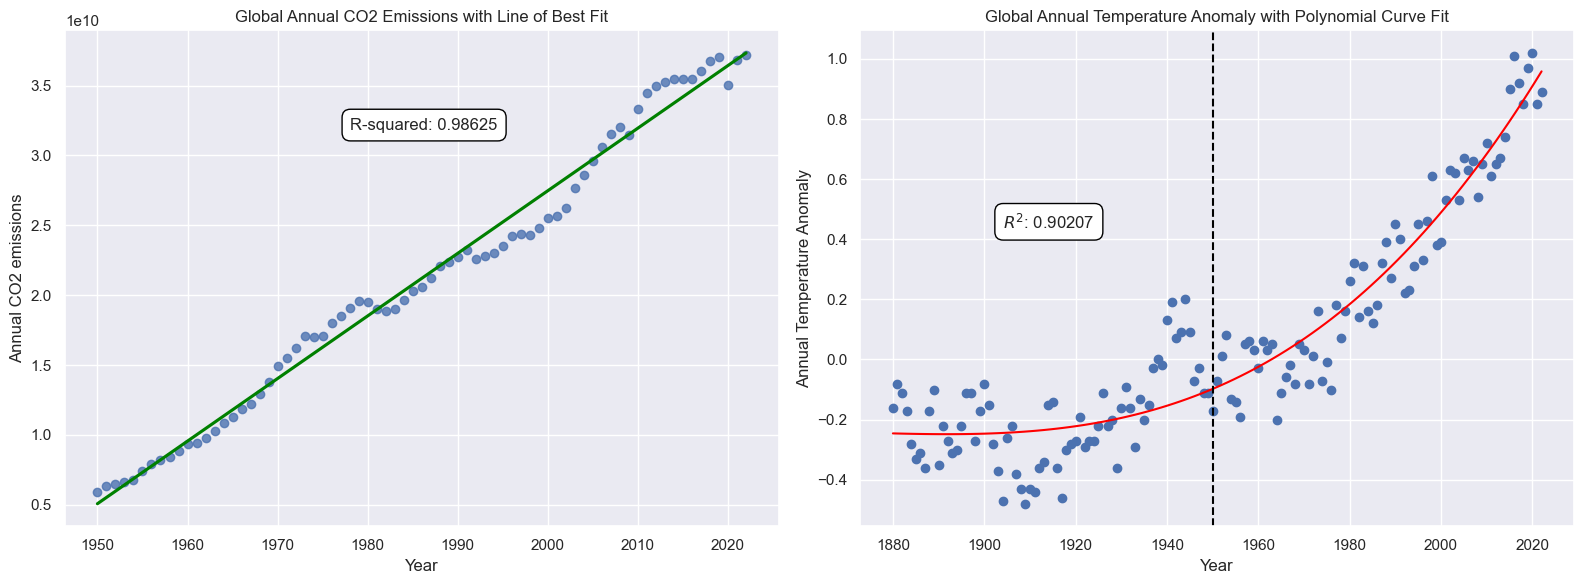

In [9]:
#combine in some way the regression line for carbon emissions and the global temperature in the same figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Global Annual CO2 Emissions with Line of Best Fit
sns.regplot(data=carbon_filter2, x='Year', y='Annual CO₂ emissions', scatter=True, ci=None, line_kws={"color": "green"}, ax=axes[0])

slope, intercept, r_value, p_value, std_err = stats.linregress(carbon_filter2['Year'], carbon_filter2['Annual CO₂ emissions'])
r_squared = r_value ** 2

axes[0].set_title('Global Annual CO2 Emissions with Line of Best Fit')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Annual CO2 emissions')
axes[0].text(0.4, 0.8, f'R-squared: {r_squared:.5f}', transform=axes[0].transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Plot 2: Global Annual Temperature Anomaly with Polynomial Curve Fit
degree = 3
coefficients = np.polyfit(globaltemp_df['Year '], globaltemp_df['Temperature Anomaly\n(deg C)'], degree)
polynomial = np.poly1d(coefficients)

x_values = np.linspace(min(globaltemp_df['Year ']), max(globaltemp_df['Year ']), 100)
y_values = polynomial(x_values)

residuals = globaltemp_df['Temperature Anomaly\n(deg C)'] - polynomial(globaltemp_df['Year '])
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((globaltemp_df['Temperature Anomaly\n(deg C)'] - np.mean(globaltemp_df['Temperature Anomaly\n(deg C)'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

axes[1].scatter(globaltemp_df['Year '], globaltemp_df['Temperature Anomaly\n(deg C)'])
axes[1].plot(x_values, y_values, color='red')
axes[1].axvline(x=1950, color='black', linestyle='--')  # Vertical line at x=1950
axes[1].set_title('Global Annual Temperature Anomaly with Polynomial Curve Fit')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Annual Temperature Anomaly')
axes[1].text(0.2, 0.6, f'$R^2$: {r_squared:.5f}', transform=axes[1].transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.savefig('charts/sidebyside.png')
plt.show()


In [10]:
#write dataframes to json
globaltemp_df.to_json('charts/globaltemp.json', orient='records')
carbon_filter1.to_json('charts/countrycarbon.json', orient='records')
carbon_filter2.to_json('charts/worldcarbon.json', orient='records')
